In [1]:
print('hello world')
print('be productive')

hello world
be productive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

random.seed('spearhead')

In [3]:
ship_table = pd.read_csv('Ship_Performance_Dataset.csv')

ship_table.head(2)

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,2023-06-04,Container Ship,NaN,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372


In [4]:
ship_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     2736 non-null   object 
 1   Ship_Type                2600 non-null   object 
 2   Route_Type               2600 non-null   object 
 3   Engine_Type              2600 non-null   object 
 4   Maintenance_Status       2600 non-null   object 
 5   Speed_Over_Ground_knots  2736 non-null   float64
 6   Engine_Power_kW          2736 non-null   float64
 7   Distance_Traveled_nm     2736 non-null   float64
 8   Draft_meters             2736 non-null   float64
 9   Weather_Condition        2600 non-null   object 
 10  Cargo_Weight_tons        2736 non-null   float64
 11  Operational_Cost_USD     2736 non-null   float64
 12  Revenue_per_Voyage_USD   2736 non-null   float64
 13  Turnaround_Time_hours    2736 non-null   float64
 14  Efficiency_nm_per_kWh   

In [5]:
# ship_table['Ship_Type'].isnull()
# ship_table.info()

# Better Approach
df = ship_table.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2127 entries, 1 to 2735
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     2127 non-null   object 
 1   Ship_Type                2127 non-null   object 
 2   Route_Type               2127 non-null   object 
 3   Engine_Type              2127 non-null   object 
 4   Maintenance_Status       2127 non-null   object 
 5   Speed_Over_Ground_knots  2127 non-null   float64
 6   Engine_Power_kW          2127 non-null   float64
 7   Distance_Traveled_nm     2127 non-null   float64
 8   Draft_meters             2127 non-null   float64
 9   Weather_Condition        2127 non-null   object 
 10  Cargo_Weight_tons        2127 non-null   float64
 11  Operational_Cost_USD     2127 non-null   float64
 12  Revenue_per_Voyage_USD   2127 non-null   float64
 13  Turnaround_Time_hours    2127 non-null   float64
 14  Efficiency_nm_per_kWh    2127

In [6]:
df.columns

Index(['Date', 'Ship_Type', 'Route_Type', 'Engine_Type', 'Maintenance_Status',
       'Speed_Over_Ground_knots', 'Engine_Power_kW', 'Distance_Traveled_nm',
       'Draft_meters', 'Weather_Condition', 'Cargo_Weight_tons',
       'Operational_Cost_USD', 'Revenue_per_Voyage_USD',
       'Turnaround_Time_hours', 'Efficiency_nm_per_kWh',
       'Seasonal_Impact_Score', 'Weekly_Voyage_Count',
       'Average_Load_Percentage'],
      dtype='object')

In [7]:
df.corr(numeric_only=True)

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
Speed_Over_Ground_knots,1.000000,-0.003418,-0.020910,-0.001154,-0.005315,-0.037313,-0.007315,-0.005852,0.021941,0.028013,0.028241,-0.023010
Engine_Power_kW,-0.003418,1.000000,0.019513,0.010585,-0.023154,-0.013084,-0.004830,-0.042732,-0.013101,-0.020896,0.057647,0.030977
Distance_Traveled_nm,-0.020910,0.019513,1.000000,-0.012352,0.004833,0.018911,0.056033,-0.015876,-0.011757,0.013607,0.049771,-0.029574
Draft_meters,-0.001154,0.010585,-0.012352,1.000000,0.026118,-0.006377,0.022005,-0.022383,-0.025276,-0.013314,0.016618,-0.015922
Cargo_Weight_tons,-0.005315,-0.023154,0.004833,0.026118,1.000000,-0.037521,0.008617,-0.029312,0.015545,-0.028628,-0.020576,0.015010
Operational_Cost_USD,-0.037313,-0.013084,0.018911,-0.006377,-0.037521,1.000000,0.031495,-0.001652,0.009405,0.016089,-0.000211,-0.021097
Revenue_per_Voyage_USD,-0.007315,-0.004830,0.056033,0.022005,0.008617,0.031495,1.000000,-0.021111,0.013535,0.019485,0.027058,0.029107
Turnaround_Time_hours,-0.005852,-0.042732,-0.015876,-0.022383,-0.029312,-0.001652,-0.021111,1.000000,0.032324,0.008424,-0.007566,0.026632
Efficiency_nm_per_kWh,0.021941,-0.013101,-0.011757,-0.025276,0.015545,0.009405,0.013535,0.032324,1.000000,-0.008209,-0.008080,0.005717
Seasonal_Impact_Score,0.028013,-0.020896,0.013607,-0.013314,-0.028628,0.016089,0.019485,0.008424,-0.008209,1.000000,-0.001581,-0.029039


In [8]:
# feature to use
# 6 && 7 && 10
feature1 = 'Engine_Power_kW'
feature2 = 'Distance_Traveled_nm'
feature3 = 'Cargo_Weight_tons'

newdf = df[[feature1, feature2, feature3]]
newdf.head()

,Engine_Power_kW,Distance_Traveled_nm,Cargo_Weight_tons
1,1796.057415,1060.486382,162.394712
2,1648.556685,658.874144,178.040917
3,915.261795,1126.822519,1737.385346
4,1089.721803,1445.281159,260.595103
5,2171.646567,723.304215,1912.509751


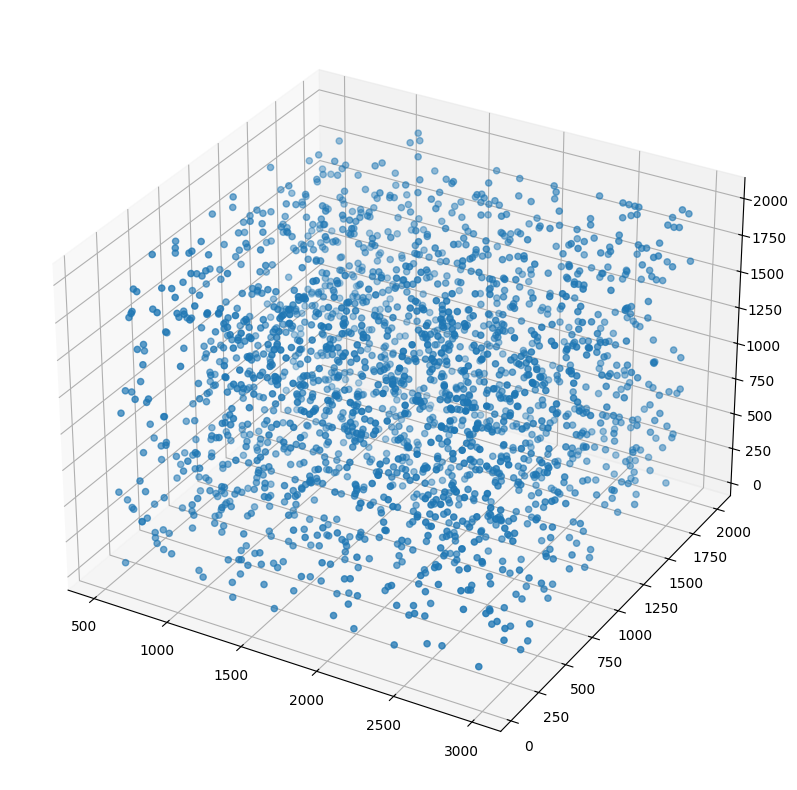

In [9]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
ax.scatter(newdf[feature1], df[feature2], df[feature3])
plt.show()

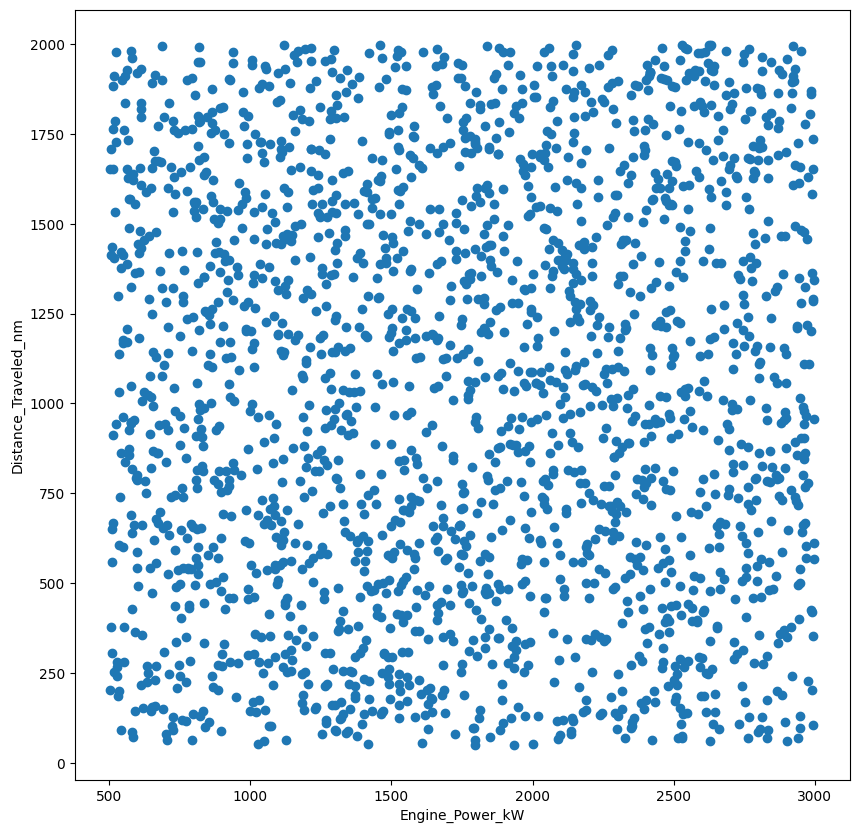

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(newdf[feature1], df[feature2])
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
plt.show()

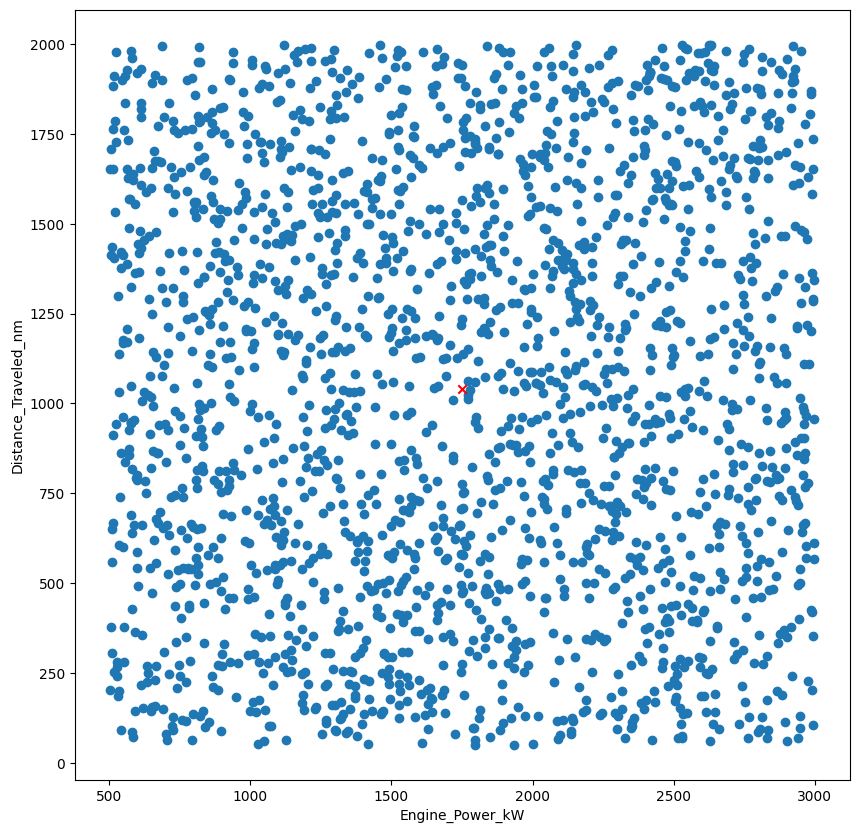

In [11]:
centroid = [newdf[feature1].mean(), newdf[feature2].mean()]
# print(centroid1)
# k = 1
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(newdf[feature1], df[feature2])
ax.scatter(centroid[0], centroid[1], color='red', marker='x') 
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
plt.show()

In [12]:
def randompoint(feature):
  min = newdf[feature].min()
  max = newdf[feature].max()
  # print(min, max)
  return random.randint(min.astype(np.int64), max.astype(np.int64))

centroids = np.array([[randompoint(feature1), randompoint(feature2)] for _ in range(3)])

print(centroids)

[[1665  881]
 [1500 1907]
 [2819 1914]]


[[1665 1500 2819]
 [ 881 1907 1914]]


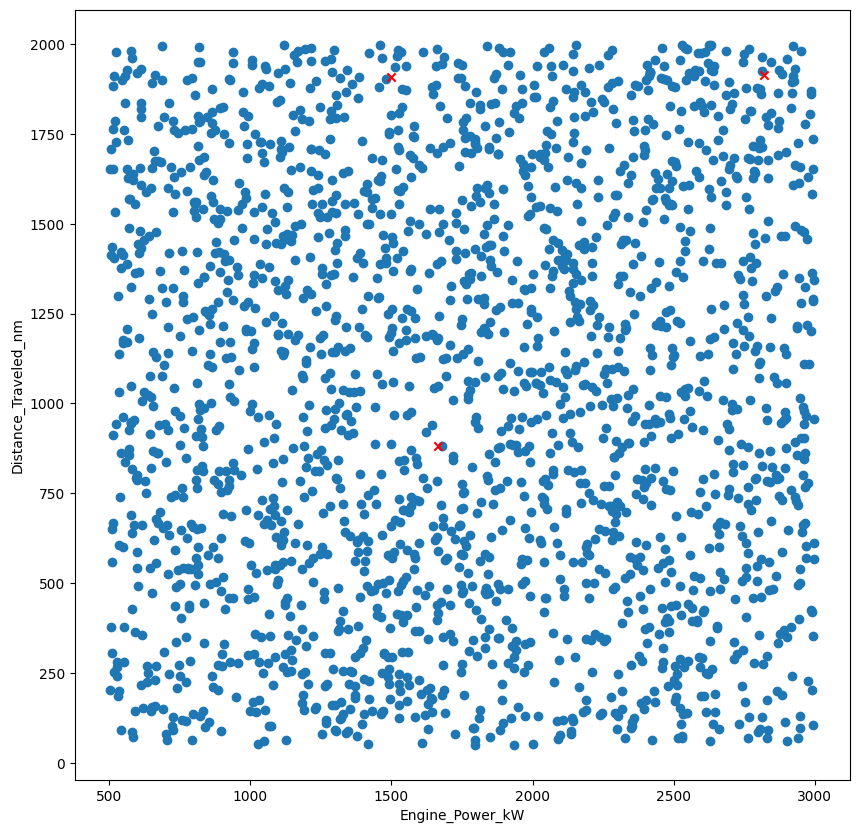

In [13]:
centroids = centroids.T
print(centroids)

# k = 3
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(newdf[feature1], df[feature2])
ax.scatter(centroids[0], centroids[1], color='red', marker='x')
ax.set_xlabel(feature1)
ax.set_ylabel(feature2) 
plt.show()